In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation
import numpy as np
matplotlib.rcParams['animation.embed_limit'] = 2**128
from numpy import linalg as LA
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [257]:
L1 = 0.374
L2 = 360
h_teta = 0.5
h_r = 0.0005
F = -2
l1 = int(L1/h_r + 2)
l2 = int(L2/h_teta + 2)
n = int((l2 - 2) / 8)
u = np.zeros((l1, l2))
u_next = np.zeros((l1, l2))
print(n)

90


In [258]:
f = np.zeros((l1,l2))
f[:][:] = F

In [259]:
r = np.linspace(1/3, (2)**(-1/2), l1-2)
r = np.append([r[0]], r)
r = np.flip(np.append(r, [r[-1]]))
r = np.tile(r , (l2, 1)).T
print(r.shape)
print(r)

(750, 722)
[[0.70710678 0.70710678 0.70710678 ... 0.70710678 0.70710678 0.70710678]
 [0.70710678 0.70710678 0.70710678 ... 0.70710678 0.70710678 0.70710678]
 [0.70660642 0.70660642 0.70660642 ... 0.70660642 0.70660642 0.70660642]
 ...
 [0.3338337  0.3338337  0.3338337  ... 0.3338337  0.3338337  0.3338337 ]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]]


In [270]:
y = \
np.concatenate((
np.concatenate((\
np.concatenate((1/2/np.cos(np.linspace(0, np.pi/4, n, endpoint=False)),
                1/2/np.sin(np.linspace(np.pi/4, 3/4*np.pi, 2*n, endpoint=False)))),
np.concatenate((-1/2/np.cos(np.linspace(np.pi*3/4, 5/4*np.pi, 2*n, endpoint=False)), 
                -1/2/np.sin(np.linspace(np.pi*5/4, 7/4*np.pi, 2*n, endpoint=False)))))),
    1/2/np.cos(np.linspace(7/4*np.pi, 2*np.pi, n))))
y = np.append([1/2], y)
y = np.append(y, [1/2])
# print(y)

<IPython.core.display.Javascript object>


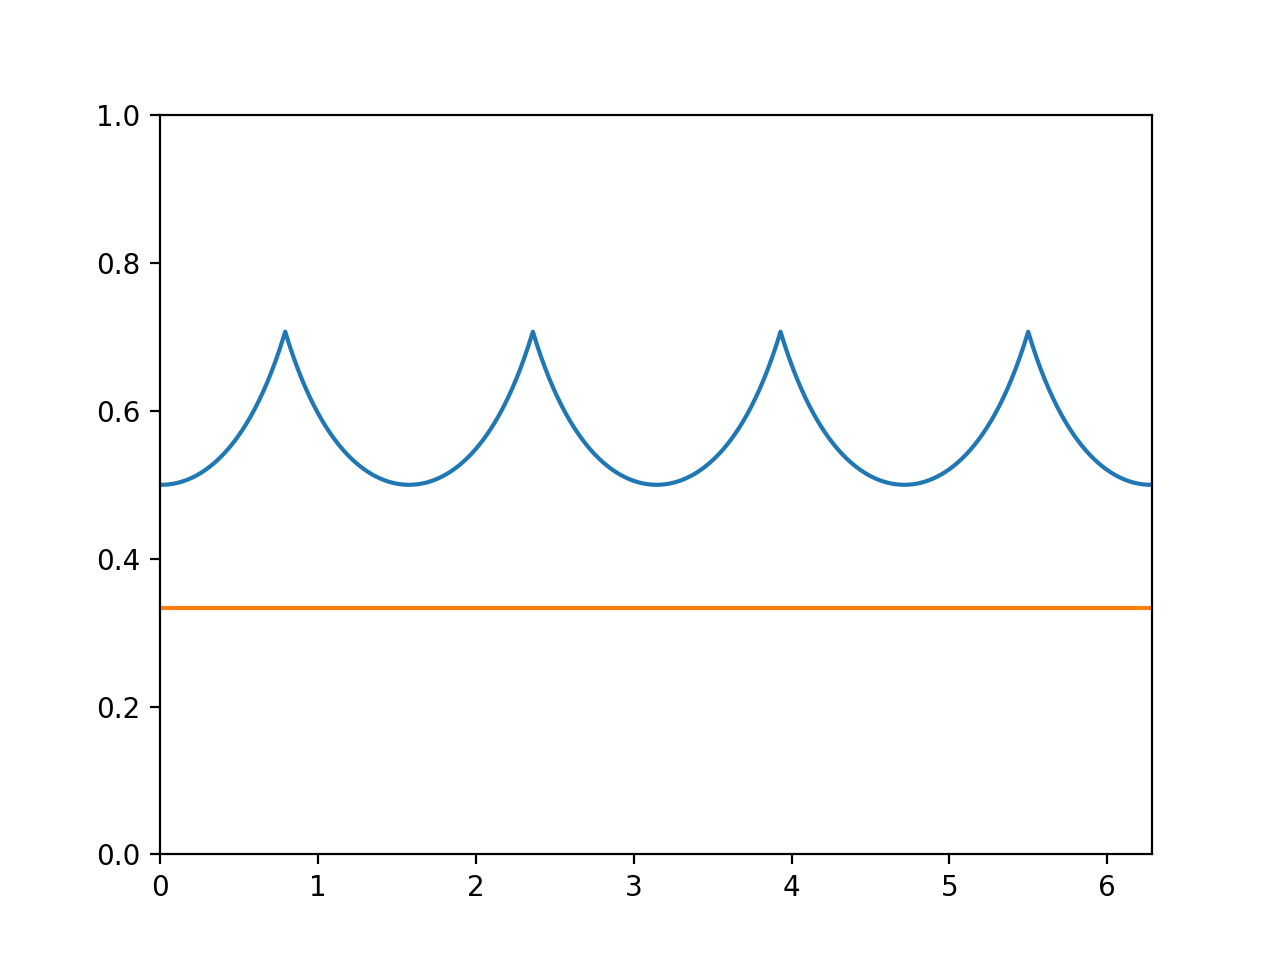

In [271]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 2*np.pi), ylim=(0, 1))
plt.plot(np.linspace(0, 2*np.pi, len(y)), y)
plt.plot(np.linspace(0, np.pi*2, 40), np.linspace(1/3, 1/3, 40));

In [262]:
# for i in range(l1):
#     for j in range (l2):
#         if (1/3 + (l1 - i + 1)/l1*((2)**(-1/2) - 1/3)) > y[j]:
#             u[i][j] = 0

In [263]:
e = np.ones((l1, l2))
c = (r*h_teta*h_r)*(r*h_teta*h_r)/(h_r*h_r*e + h_teta*h_teta*r*r)
c1 = -c
c2 = c/h_r
c3 = c/(2*r*h_r)
c4 = c/(r*r*h_teta*h_teta)

In [255]:
# np.concatenate((f[1:], np.zeros(l2).reshape((1,l2))), axis=0)   +\
#                                np.concatenate((np.zeros(l2).reshape((1,l2)), f[:-1]), axis=0)  +\
#                                np.concatenate((np.zeros(l1).reshape((l1,1)), f[:,:-1]), axis=1)+\
#                                np.concatenate((f[:,1:], np.zeros(l1).reshape((l1,1))), axis=1))
# print(np.concatenate(( f[1:],np.zeros(l2).reshape((1,l2))), axis=0)[:,0])
print(np.max(c2))

0.000499999000002


In [264]:
print ("norm = ", LA.norm(u - u_next))
for i in range(500):
    u_next = c1 * f + \
             c2 * (np.concatenate((np.zeros(l2).reshape((1,l2)), u[:-1]), axis=0) +\
                   np.concatenate((u[1:], np.zeros(l2).reshape((1,l2))), axis=0)) +\
             c3 * (np.concatenate((np.zeros(l2).reshape((1,l2)), u[:-1]), axis=0) -\
                   np.concatenate((u[1:], np.zeros(l2).reshape((1,l2))), axis=0)) +\
             c4 * (np.concatenate((u[:,1:], np.zeros(l1).reshape((l1,1))), axis=1) +\
                   np.concatenate((np.zeros(l1).reshape((l1,1)), u[:,:-1]), axis=1))
                      
              
    u_next[u_next.shape[0] - 1,:] = 1/3 * (4 * u_next[u_next.shape[0] - 2,:] - u_next[u_next.shape[0] - 3,:])
    u_next[:,0] = u[:,u.shape[1] - 2]
    u_next[:,u.shape[1] - 1] = u[:,1]
    for i in range(l1):
        for j in range (l2):
            if (1/3 + (l1 - i + 1)/l1*((2)**(-1/2) - 1/3)) > y[j]:
                u_next[i][j] = 0
    if i == 498:
        break
    u = u_next

print ("norm_fin = ", LA.norm(u - u_next))

norm =  0.0
norm_fin =  0.0


In [267]:
y = np.linspace(1/3+L1, 1/3, l1)
x = np.linspace(0, L2, l2)
X, Y = np.meshgrid(x, y)
print(u.shape)
#u_next = u_next[1:-1,1:-1]

print(u_next.shape)
# print(u_next[360])

(750, 722)
(750, 722)


<IPython.core.display.Javascript object>


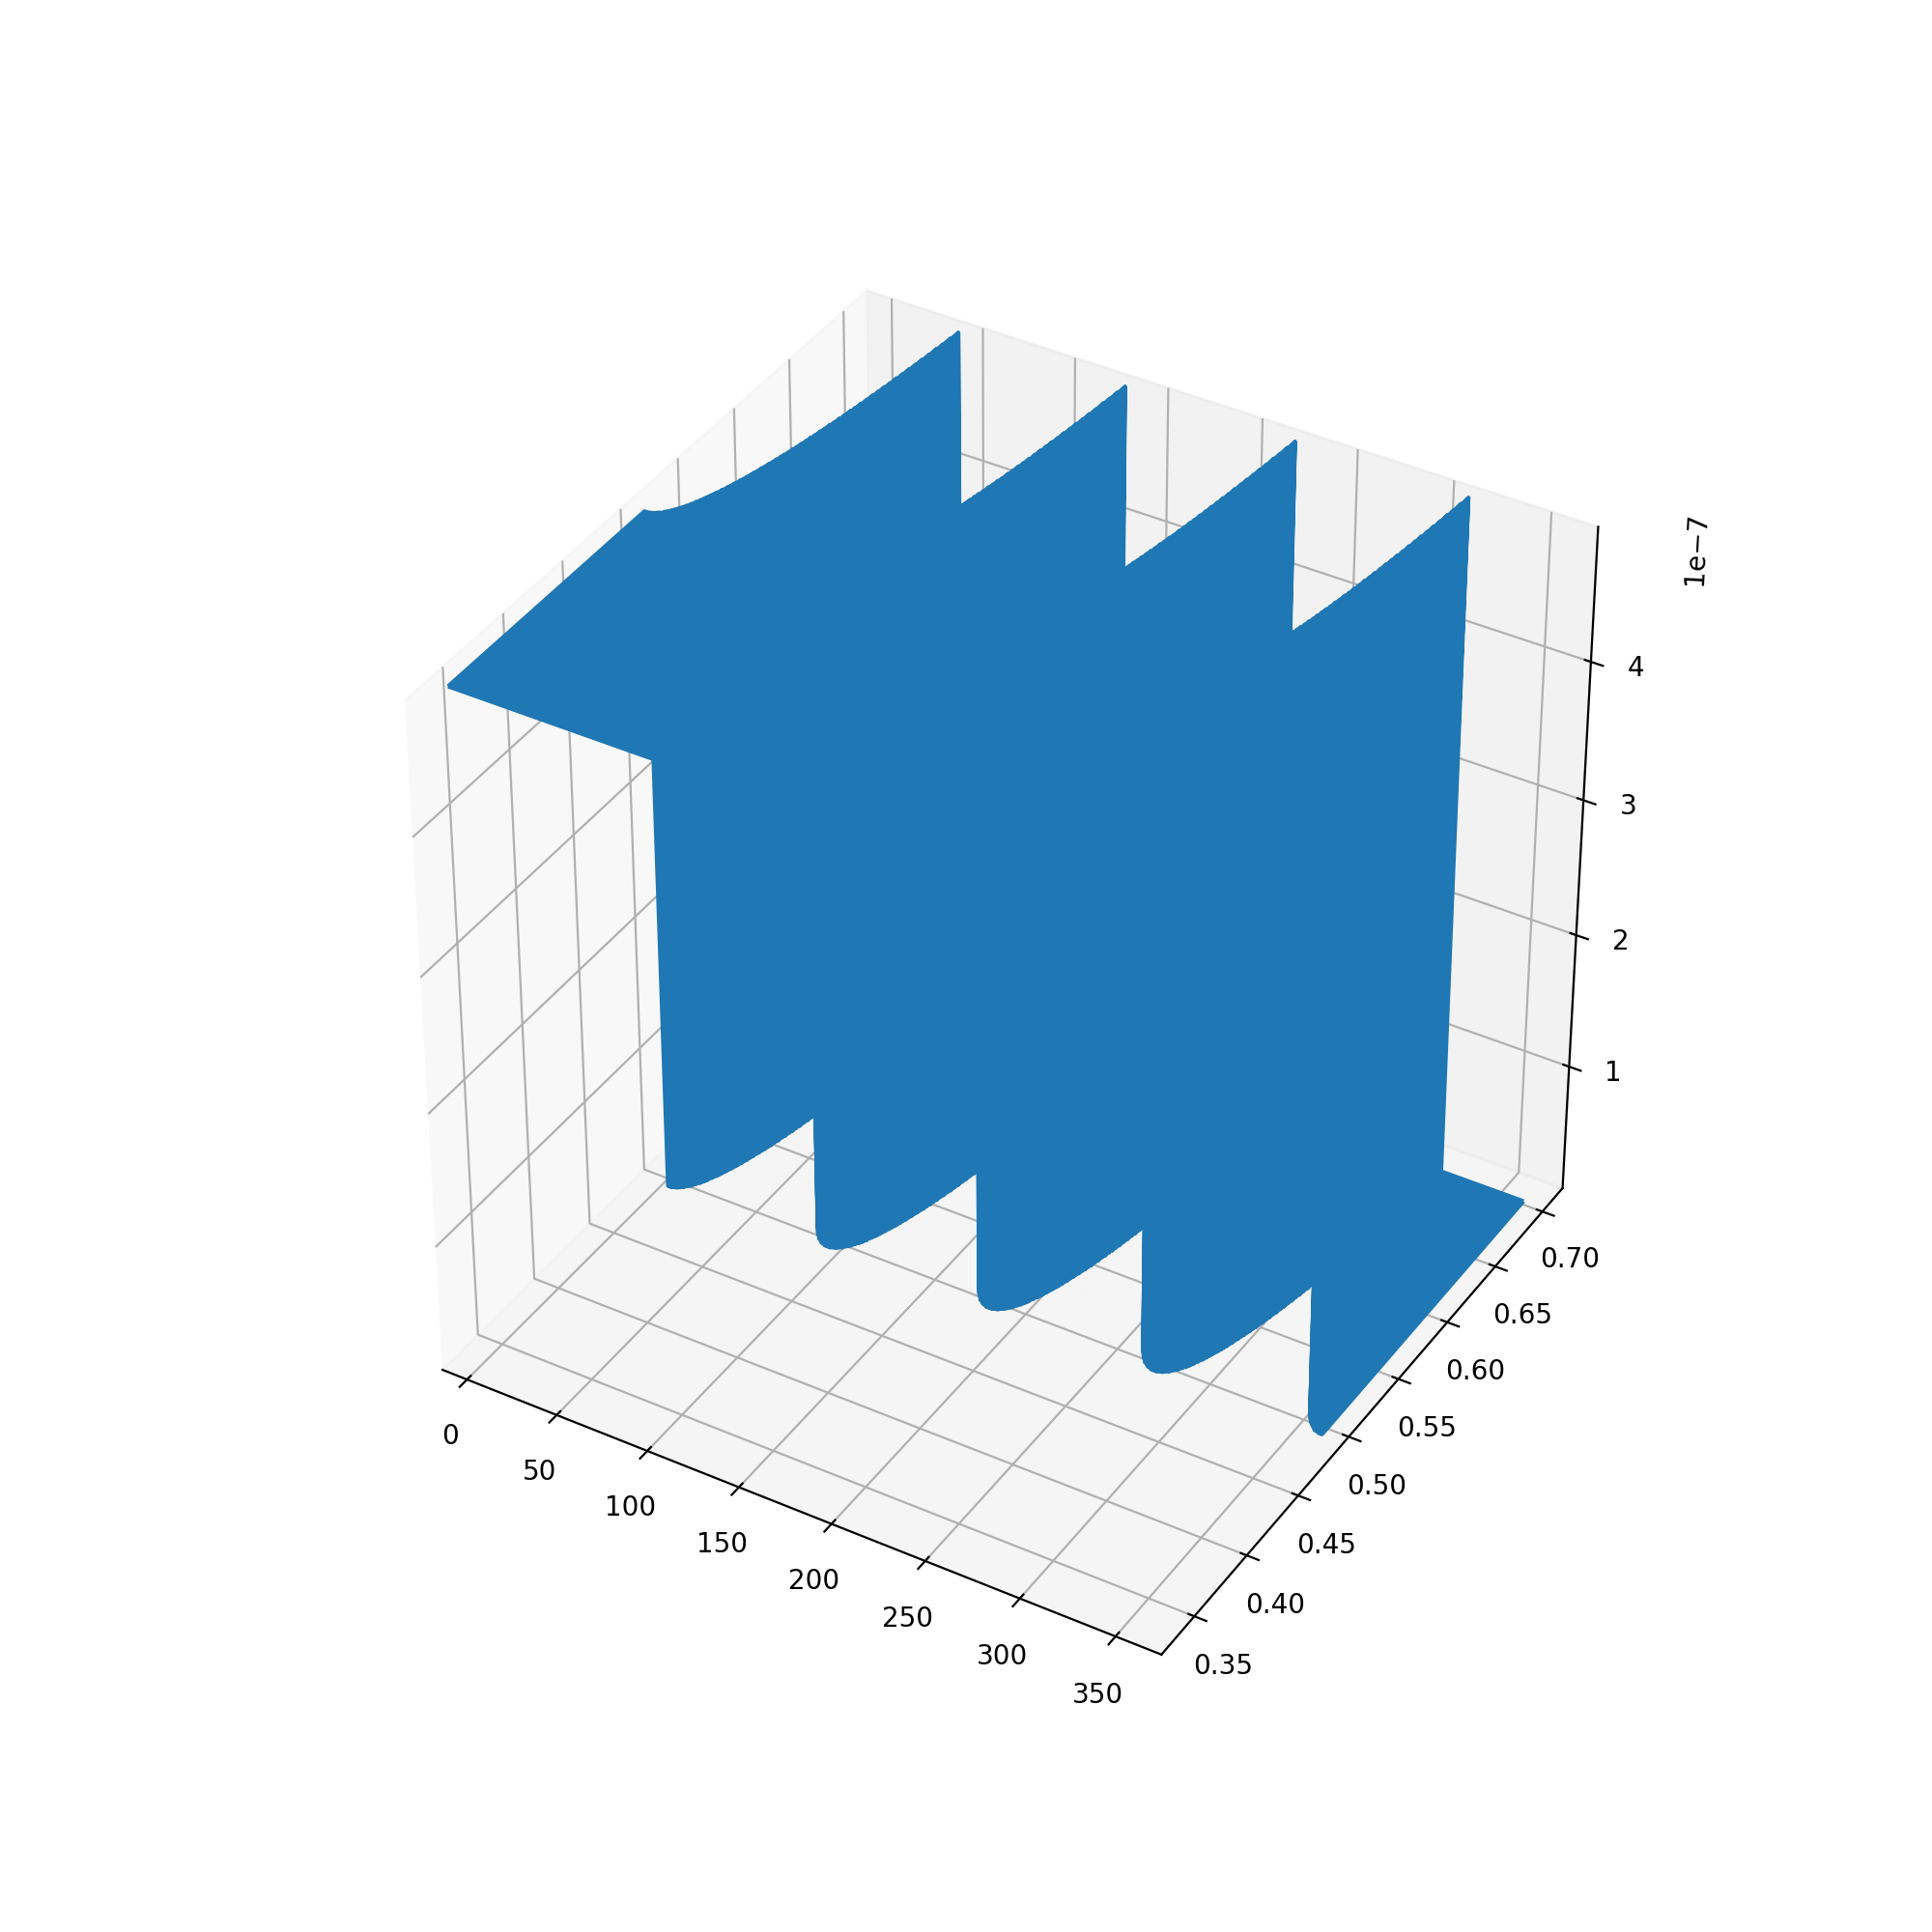

In [266]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X,Y,u_next, rstride=2, cstride=2)
plt.show()